## Preparing the Data

In [16]:
import pandas as pd
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv") #Loading the data
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv") #Loading the data

In [18]:
# Separate target values
y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

# Separate our our image vectors
x_train = train_df.values
x_valid = valid_df.values

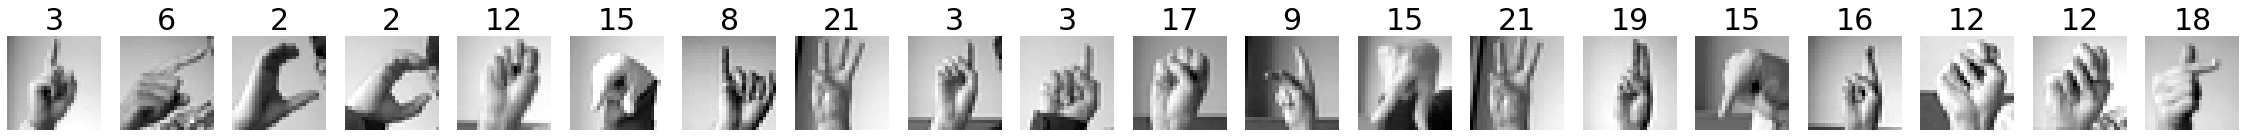

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [20]:
#Normalize the Image Data
x_train = x_train / 255
x_valid = x_valid / 255

In [21]:
# Categorize the Labels
# Turn our scalar targets into binary categories
import tensorflow.keras as keras
num_classes = 24
y_train = keras.utils.to_categorical(y_train, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

## Model Creation

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 24)                12312     
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


## Compiling

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training

In [25]:
history = model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid)) 

Epoch 1/20
858/858 [==============================] - 2s 3ms/step - loss: 1.9462 - accuracy: 0.3789 - val_loss: 1.3894 - val_accuracy: 0.5842
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 0.9732 - accuracy: 0.6677 - val_loss: 1.0197 - val_accuracy: 0.6504
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 0.5938 - accuracy: 0.7960 - val_loss: 0.7324 - val_accuracy: 0.7619
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 0.4067 - accuracy: 0.8694 - val_loss: 0.7333 - val_accuracy: 0.7843
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 0.3107 - accuracy: 0.9099 - val_loss: 0.8559 - val_accuracy: 0.7960
Epoch 6/20
858/858 [==============================] - 3s 3ms/step - loss: 0.2515 - accuracy: 0.9320 - val_loss: 1.0763 - val_accuracy: 0.7676
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2221 - accuracy: 0.9435 - val_loss: 1.0955 - val_accuracy: 0.7868
Epoch 

## Plot

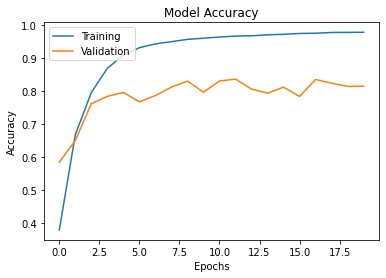

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training','Validation'], loc = 'upper left')
